# Logistic regression
> In this chapter you will delve into the details of logistic regression. You'll learn all about regularization and how to interpret model output. This is the Summary of lecture "Linear Classifiers in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

## Logistic regression and regularization
- Regularized logistic regression
    - Hyperparameter "C" is the inverse of the regularization strength
        - Larger "C": less regularization
        - Smaller "C": more regularization
    - regularized loss = original loss + large coefficient penalty
        - more regularization: lower training accuracy
        - more regularization: (almost always) higher test accuracy
- L1 vs. L2 regularization
    - Lasso = linear regression with L1 regularization
    - Ridge = linear regression with L2 regularization
   

### Regularized logistic regression
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization. The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.



In [4]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

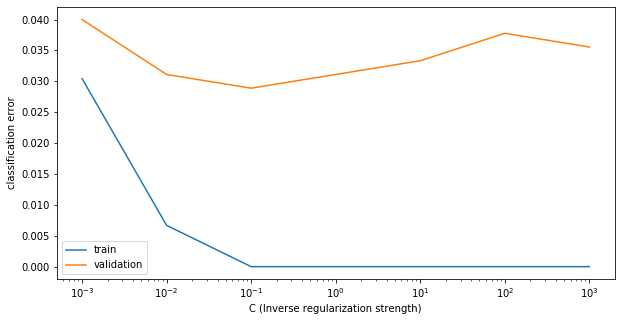

In [10]:
# Train and validation errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=10000)
    lr.fit(X_train, y_train)
    
    # Evalueate error rates and append to lists
    train_errs.append(1.0 - lr.score(X_train, y_train))
    valid_errs.append(1.0 - lr.score(X_valid, y_valid))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs);
plt.ylabel('classification error')
plt.xlabel('C (Inverse regularization strength)')
plt.legend(("train", "validation"));

### Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in `X_train` and `y_train`.

We'll search for the best value of C using scikit-learn's `GridSearchCV()`, which was covered in the prerequisite course.

In [11]:
from sklearn.datasets import load_svmlight_file

X_train, y_train = load_svmlight_file('./dataset/aclImdb/train/labeledBow.feat')
y_train[y_train < 5] = -1.0
y_train[y_train >= 5] = 1.0

In [13]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (select features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 89527
Number of selected features: 1106


### Identifying the most positive and negative words
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable `lr`.

In addition, the words corresponding to the different features are loaded into the variable `vocab`. For example, since `vocab[100]` is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [19]:
vocab = pd.read_csv('./dataset/vocab.csv').to_numpy()

In [15]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

In [21]:
# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: ['excellent'], ['refreshing'], ['wonderfully'], ['perfect'], ['superb'], 

Most negative words: ['waste'], ['worst'], ['disappointment'], ['poorly'], ['awful'], 



## Logistic regression and probabilities
